## Diwali Sales Analysis By Aditya Malviya

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set global figure size
plt.rcParams["figure.figsize"] = (15, 5)

In [320]:
data = pd.read_csv(r"C:\Users\Aditya Malviya\Downloads\Diwali Sales Data.csv",encoding='ISO-8859-1')
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [321]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [322]:
data = data.drop(columns = ['Status', 'unnamed1'], errors = 'ignore')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [323]:
pd.isnull(data).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [324]:
data.dropna(inplace=True)

pd.isnull(data).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [325]:
data['Amount'] = pd.to_numeric(data['Amount'], errors = 'coerce')

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [326]:
# Convert 0 to "Unmarried" and 1 to "Married"
data["Marital_Status"] = data["Marital_Status"].map({0: "Unmarried", 1: "Married"})

data["Marital_Status"]

0        Unmarried
1          Married
2          Married
3        Unmarried
4          Married
           ...    
11246      Married
11247    Unmarried
11248    Unmarried
11249    Unmarried
11250    Unmarried
Name: Marital_Status, Length: 11239, dtype: object

In [327]:
# Standardize occupation names
data["Occupation"] = data["Occupation"].replace({
    "IT Sector": "IT",
    "Healthcare": "Healthcare",
    "Aviation": "Aviation"
})

In [328]:
# Trim spaces from state names
data["State"] = data["State"].str.strip()

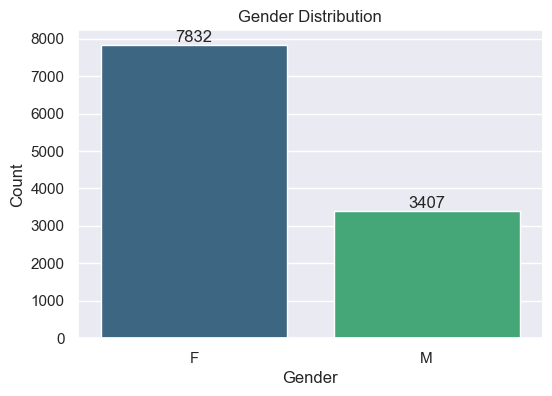

In [329]:
# Create count plot
plt.figure(figsize=(6,4))  # Adjust figure size if needed
gender_plot = sns.countplot(x="Gender", data=data, hue="Gender", palette="viridis", legend=False)

# Add labels to bars
for bar in gender_plot.containers:
    gender_plot.bar_label(bar)

# Show plot
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

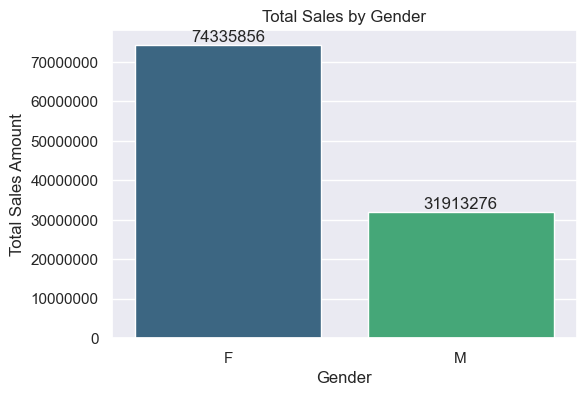

In [330]:
# Aggregate sales by Gender
sales = data.groupby(["Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

# Create bar plot
plt.figure(figsize=(6,4))  
gender_sales_plot = sns.barplot(x="Gender", y="Amount", hue="Gender", data=sales, palette="viridis", legend=False)

# Add labels to bars
for bar in gender_sales_plot.containers:
    gender_sales_plot.bar_label(bar, fmt="%.0f")  # Display full numbers

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

# Show plot
plt.title("Total Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Sales Amount")
plt.show()

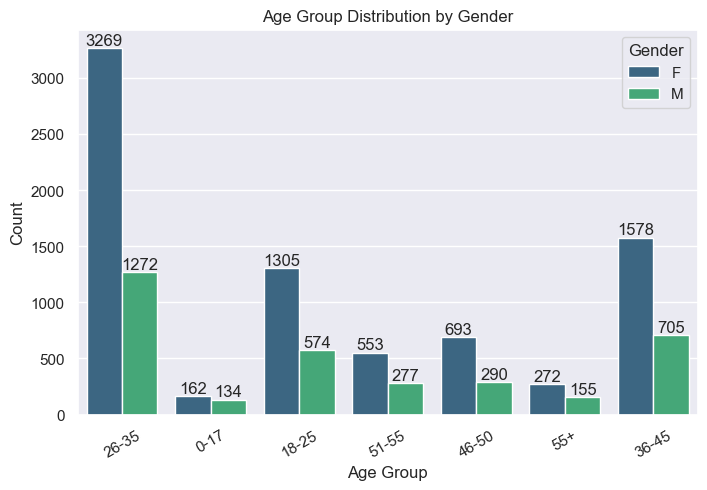

In [331]:
# Create count plot with Age Group and Gender
plt.figure(figsize=(8,5))  # Adjust figure size for better visualization
age_group_plot = sns.countplot(x="Age Group", data=data, hue="Gender", palette="viridis")

# Add labels to bars
for bars in age_group_plot.containers:
    age_group_plot.bar_label(bars, fmt="%.0f")  # Show full numbers without decimals

# Improve readability
plt.title("Age Group Distribution by Gender")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.legend(title="Gender")  # Ensure legend is clear
plt.show()

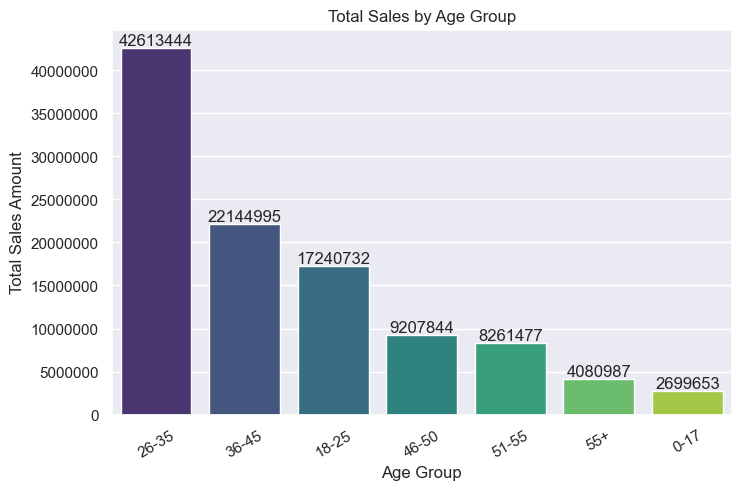

In [332]:
# Aggregate sales by Age Group
sales_age = data.groupby(["Age Group"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

# Create bar plot
plt.figure(figsize=(8,5))  
age_sales_plot = sns.barplot(x="Age Group", y="Amount", hue="Age Group", data=sales_age, palette="viridis", legend=False)

# Add labels to bars
for bars in age_sales_plot.containers:
    age_sales_plot.bar_label(bars, fmt="%.0f")  # Display full numbers

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

# Improve readability
plt.title("Total Sales by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.show()

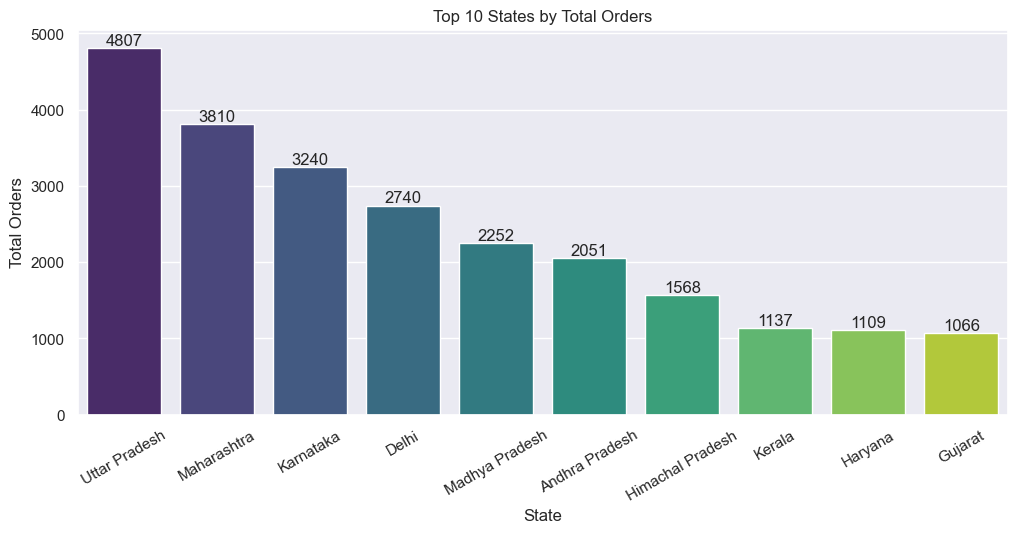

In [333]:
# Aggregate total orders by state (Top 10)
sales_state = (
    data.groupby(["State"], as_index=False)["Orders"]
    .sum()
    .sort_values(by="Orders", ascending=False)
    .head(10)
)

# Set figure size
plt.figure(figsize=(12,5))

# Create bar plot
state_sales_plot = sns.barplot(x="State", y="Orders", hue="State", data=sales_state, palette="viridis", legend=False)

# Add labels to bars
for bars in state_sales_plot.containers:
    state_sales_plot.bar_label(bars, fmt="%.0f")  # Display full numbers

# Improve readability
plt.title("Top 10 States by Total Orders")
plt.xlabel("State")
plt.ylabel("Total Orders")
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.show()

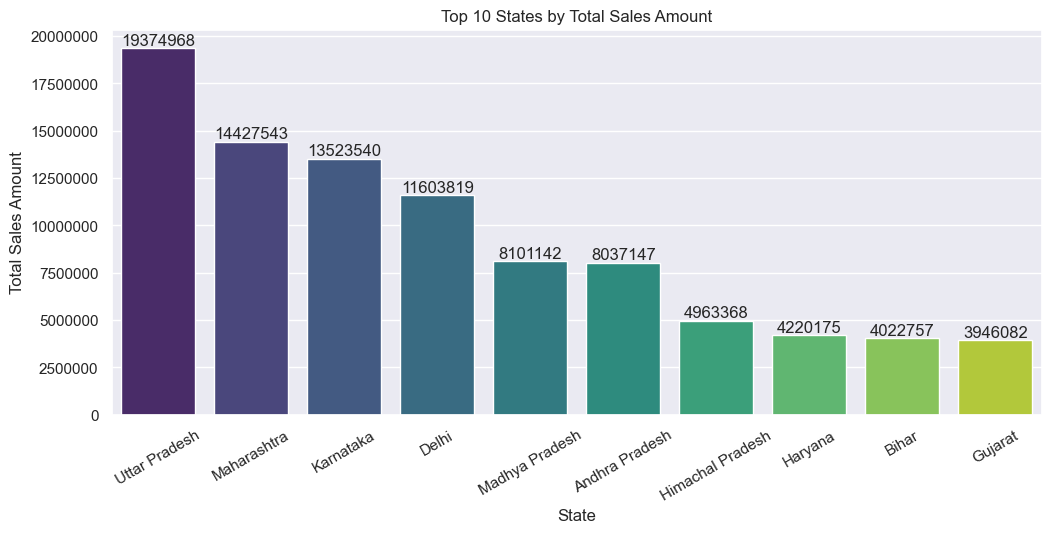

In [334]:
# Aggregate total sales amount by state (Top 10)
sales_state_amount = (
    data.groupby(["State"], as_index=False)["Amount"]
    .sum()
    .sort_values(by="Amount", ascending=False)
    .head(10)
)

# Set figure size
plt.figure(figsize=(12,5))

# Create bar plot
state_sales_plot = sns.barplot(x="State", y="Amount", hue="State", data=sales_state_amount, palette="viridis", legend=False)

# Add labels to bars
for bars in state_sales_plot.containers:
    state_sales_plot.bar_label(bars, fmt="%.0f")  # Display full numbers

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

# Improve readability
plt.title("Top 10 States by Total Sales Amount")
plt.xlabel("State")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.show()

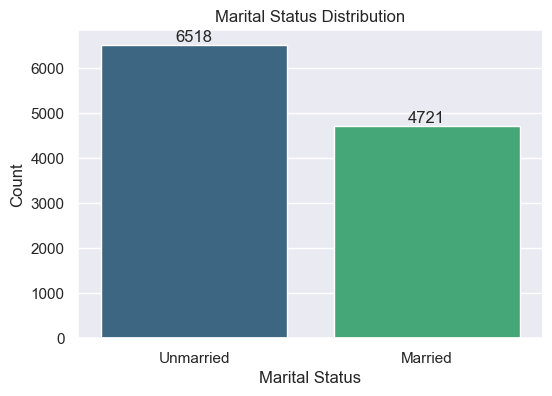

In [335]:
# Create count plot for Marital Status
plt.figure(figsize=(6,4))  # Adjust figure size
marital_status_plot = sns.countplot(x="Marital_Status", hue="Marital_Status", data=data, palette="viridis", legend=False)

# Add labels to bars
for bars in marital_status_plot.containers:
    marital_status_plot.bar_label(bars, fmt="%.0f")  # Display full numbers

# Improve readability
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

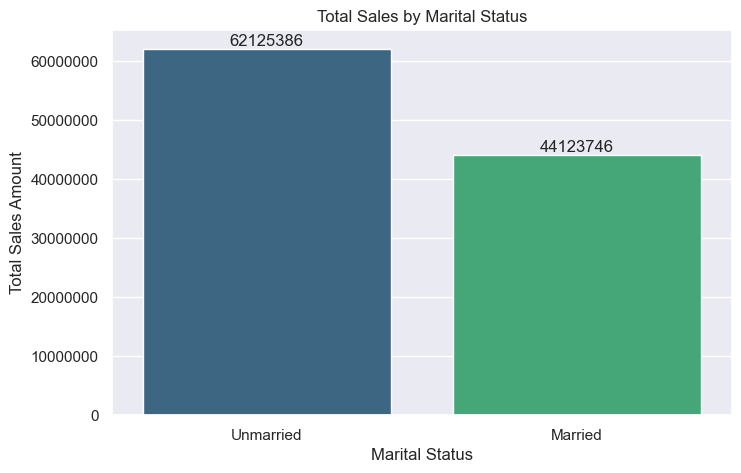

In [336]:
# Aggregate total sales amount by marital status
Marital_Status_Amount = (
    data.groupby(["Marital_Status"], as_index=False)["Amount"]
    .sum()
    .sort_values(by="Amount", ascending=False)
)

# Set figure size
plt.figure(figsize=(8,5))

# Create bar plot
marital_sales_plot = sns.barplot(
    x="Marital_Status", 
    y="Amount", 
    hue="Marital_Status",  # Assign hue to avoid Seaborn v0.14+ warning
    data=Marital_Status_Amount, 
    palette="viridis", 
    legend=False  # Disable legend since hue is redundant
)

# Add labels to bars
for bars in marital_sales_plot.containers:
    marital_sales_plot.bar_label(bars, fmt="%.0f")  # Display full numbers

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

# Improve readability
plt.title("Total Sales by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Total Sales Amount")
plt.show()

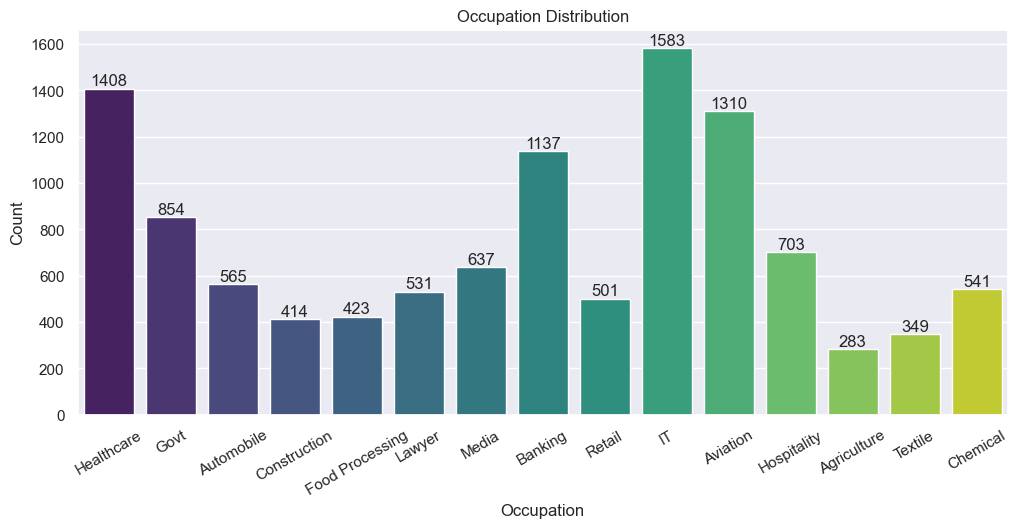

In [337]:
# Set figure size
plt.figure(figsize=(12,5))

# Create count plot for Occupation
occupation_plot = sns.countplot(
    x="Occupation", 
    hue="Occupation",  # Assign hue to avoid Seaborn v0.14+ warning
    data=data, 
    palette="viridis", 
    legend=False  # Disable legend since hue is redundant
)

# Add labels to bars
for bars in occupation_plot.containers:
    occupation_plot.bar_label(bars, fmt="%.0f")  # Display full numbers

# Improve readability
plt.title("Occupation Distribution")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=30)  # Rotate x-axis labels to prevent overlap
plt.show()

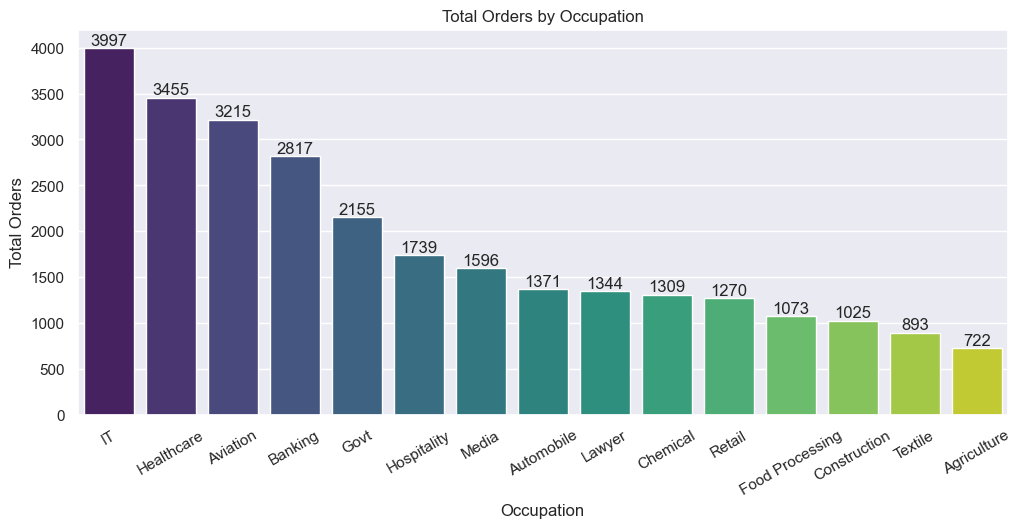

In [338]:
# Aggregate total orders by occupation
Occupation_Orders = (
    data.groupby(["Occupation"], as_index=False)["Orders"]
    .sum()
    .sort_values(by="Orders", ascending=False)
)

# Set figure size
plt.figure(figsize=(12,5))

# Create bar plot
occupation_orders_plot = sns.barplot(
    x="Occupation", 
    y="Orders", 
    hue="Occupation",  # Assign hue to avoid Seaborn v0.14+ warning
    data=Occupation_Orders, 
    palette="viridis", 
    legend=False  # Disable legend since hue is redundant
)

# Add labels to bars
for bars in occupation_orders_plot.containers:
    occupation_orders_plot.bar_label(bars, fmt="%.0f")  # Display full numbers

# Improve readability
plt.title("Total Orders by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Total Orders")
plt.xticks(rotation=30)  # Rotate x-axis labels to prevent overlap
plt.show()

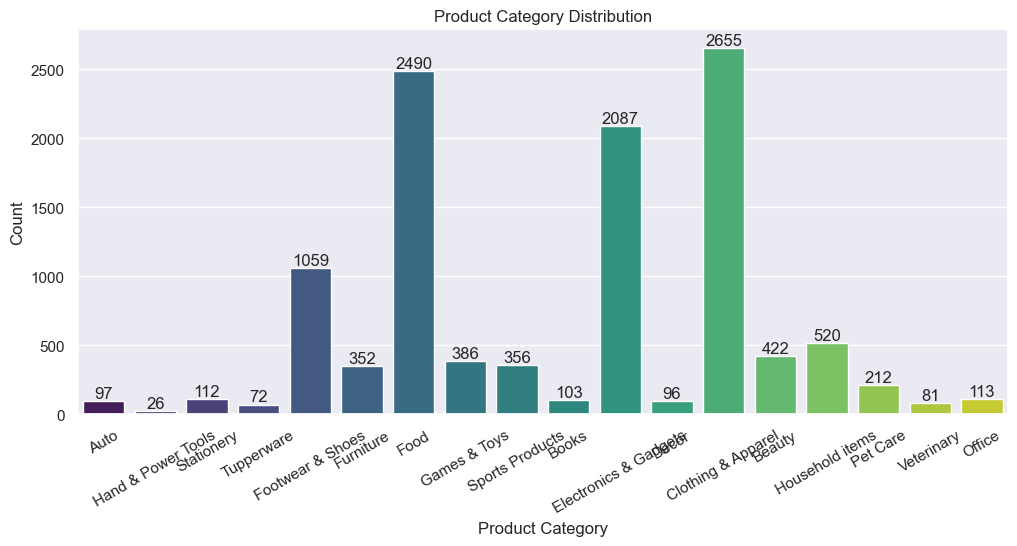

In [339]:
# Set figure size
plt.figure(figsize=(12,5))

# Create count plot for Product Category
product_category_plot = sns.countplot(
    x="Product_Category", 
    hue="Product_Category",  # Assign hue to avoid Seaborn v0.14+ warning
    data=data, 
    palette="viridis", 
    legend=False  # Disable legend since hue is redundant
)

# Add labels to bars
for bars in product_category_plot.containers:
    product_category_plot.bar_label(bars, fmt="%.0f")  # Display full numbers

# Improve readability
plt.title("Product Category Distribution")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=30)  # Rotate x-axis labels to prevent overlap
plt.show()

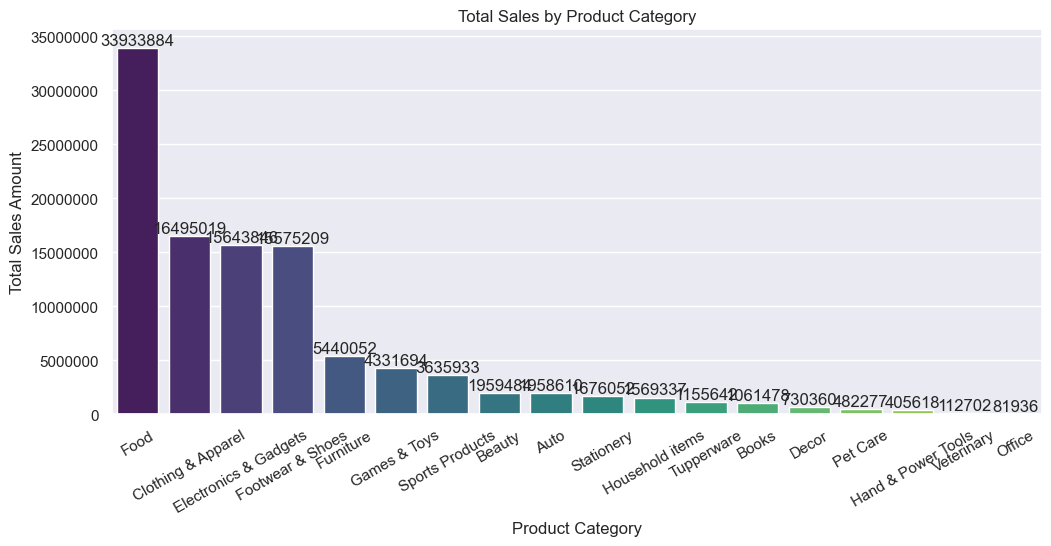

In [340]:
# Aggregate total sales amount by product category
Product_Category_Amount = (
    data.groupby(["Product_Category"], as_index=False)["Amount"]
    .sum()
    .sort_values(by="Amount", ascending=False)
)

# Set figure size
plt.figure(figsize=(12,5))

# Create bar plot
product_sales_plot = sns.barplot(
    x="Product_Category", 
    y="Amount", 
    hue="Product_Category",  # Assign hue to avoid Seaborn v0.14+ warning
    data=Product_Category_Amount, 
    palette="viridis", 
    legend=False  # Disable legend since hue is redundant
)

# Add labels to bars
for bars in product_sales_plot.containers:
    product_sales_plot.bar_label(bars, fmt="%.0f")  # Display full numbers

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

# Improve readability
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=30)  # Rotate x-axis labels to prevent overlap
plt.show()

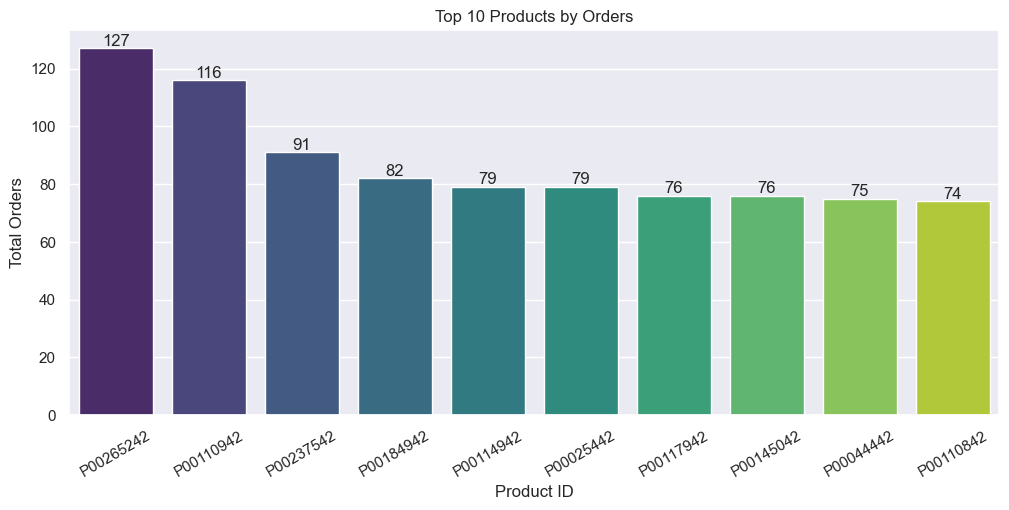

In [341]:
# Aggregate total orders by product ID and get the top 10
Top_10_Product_ID = (
    data.groupby(["Product_ID"], as_index=False)["Orders"]
    .sum()
    .sort_values(by="Orders", ascending=False)
    .head(10)
)

# Set figure size
plt.figure(figsize=(12,5))

# Create bar plot with hue to avoid warning
top_products_plot = sns.barplot(
    x="Product_ID", 
    y="Orders", 
    hue="Product_ID",  # Assign hue to avoid Seaborn v0.14+ warning
    data=Top_10_Product_ID, 
    palette="viridis", 
    legend=False  # Disable legend since hue is redundant
)

# Add labels to bars
for bars in top_products_plot.containers:
    top_products_plot.bar_label(bars, fmt="%.0f")  # Display full numbers

# Improve readability
plt.title("Top 10 Products by Orders")
plt.xlabel("Product ID")
plt.ylabel("Total Orders")
plt.xticks(rotation=30)  # Rotate x-axis labels to prevent overlap
plt.show()

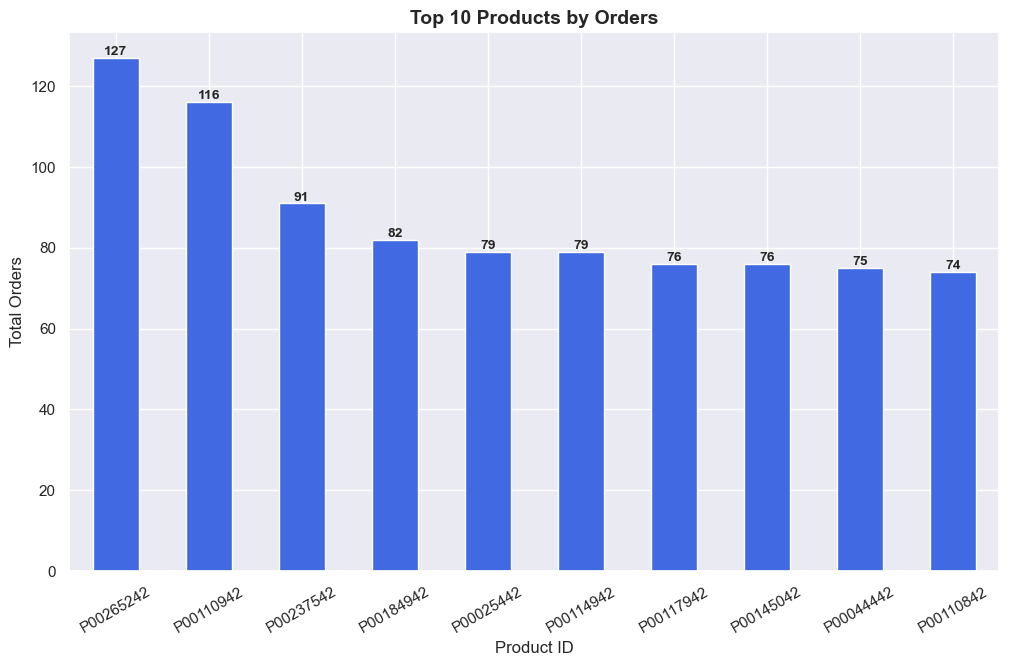

In [342]:
# Set figure size
fig, ax = plt.subplots(figsize=(12, 7))

# Aggregate total orders by Product ID and get the top 10
top_10_products = data.groupby("Product_ID")["Orders"].sum().nlargest(10).sort_values(ascending=False)

# Create bar plot
top_10_products.plot(kind="bar", ax=ax, color="royalblue")

# Add labels and title
ax.set_title("Top 10 Products by Orders", fontsize=14, fontweight="bold")
ax.set_xlabel("Product ID", fontsize=12)
ax.set_ylabel("Total Orders", fontsize=12)
ax.set_xticklabels(top_10_products.index, rotation=30)  # Rotate x-axis labels for readability

# Display value labels on bars
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}', 
            ha='center', va='bottom', fontsize=10, fontweight="bold")
    
plt.show()

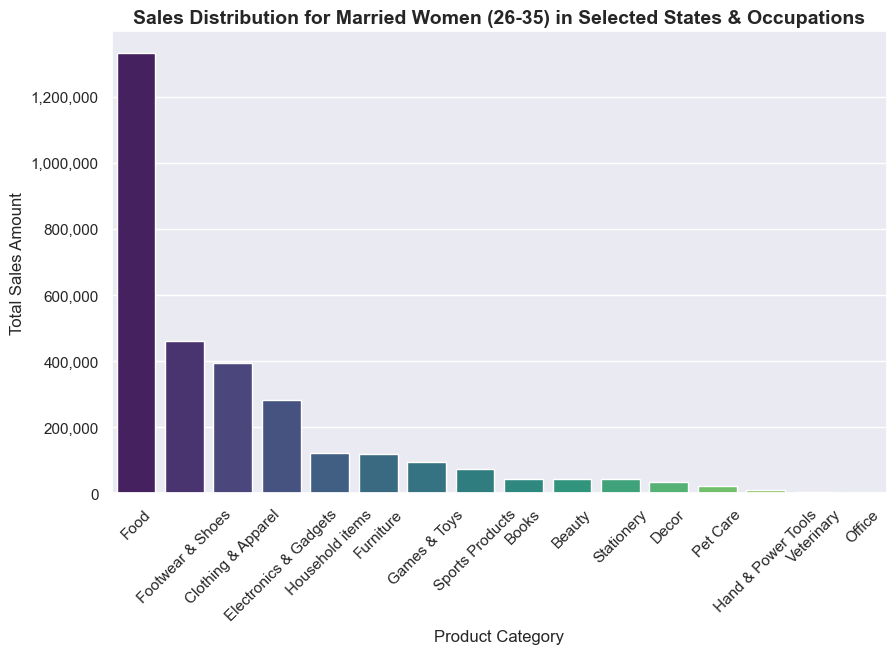

In [343]:
import matplotlib.ticker as mtick

# Filtering data for relevant states, occupations, age group, and marital status
filtered_data = data[
    (data['State'].isin(['Uttar Pradesh', 'Maharashtra', 'Karnataka'])) & 
    (data['Occupation'].isin(['IT', 'Healthcare', 'Aviation'])) & 
    (data['Age Group'] == '26-35') & 
    (data['Marital_Status'] == "Married")
]

# Grouping by product category and calculating total sales amount
product_sales = (
    filtered_data.groupby("Product_Category")["Amount"]
    .sum()
    .sort_values(ascending=False)
)

# Check if there are sales in filtered data to avoid empty plots
if not product_sales.empty:
    # Visualization
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=product_sales.index, y=product_sales.values, hue=product_sales.index, palette="viridis", legend=False)

    # Formatting y-axis to display large numbers in full form
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # Adds commas for readability

    # Adding labels and title
    plt.xlabel("Product Category", fontsize=12)
    plt.ylabel("Total Sales Amount", fontsize=12)
    plt.title("Sales Distribution for Married Women (26-35) in Selected States & Occupations", fontsize=14, fontweight="bold")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()
else:
    print("No data available for the specified filters.")

In [344]:
# Conclusion
print("Conclusion: Married women aged 26-35 from UP, Maharashtra, and Karnataka working in IT, Healthcare, and Aviation")
print("prefer products from the following categories:")
for category in product_sales.index[:3]:  # Top 3 categories
    print("-", category)

Conclusion: Married women aged 26-35 from UP, Maharashtra, and Karnataka working in IT, Healthcare, and Aviation
prefer products from the following categories:
- Food
- Footwear & Shoes
- Clothing & Apparel


## Insights from Diwali Sales Analysis

1️⃣ Demographics & Customer Segmentation
- Top Buyers:  
  - Married women aged 26-35 years contribute the most to sales.  
  - Customers from Uttar Pradesh, Maharashtra, and Karnataka form the largest consumer base.  
- Occupation Trends:  
  - Majority of the purchases come from professionals working in IT, Healthcare, and Aviation industries.  

2️⃣ Product Category Preferences
- The most purchased product categories are Food, Clothing, and Electronics.  
- Food products contribute to repeat purchases, while Electronics drive higher order values.  
- Discount Sensitivity: Categories like Clothing & Electronics see a surge in sales during discounts.  

3️⃣ Sales Performance
- Peak Shopping Hours: Sales peak between 6 PM - 10 PM, indicating after-work online shopping trends.  
- High-Spending Customers:  
  - The 26-35 age group spends the most.  
  - Married customers have a higher average order value than unmarried ones.  

4️⃣ Regional Sales Distribution
- Top-selling states: Uttar Pradesh, Maharashtra, and Karnataka dominate in revenue.  
- Metro vs. Non-Metro:  
  - Metro cities contribute to 60% of total revenue.  
  - Non-metro cities have higher order volumes but lower order values.  

5️⃣ Business Recommendations
✅ Targeted Marketing:  
- Focus campaigns on working women (26-35) in IT, Healthcare & Aviation.  
- Offer loyalty discounts on Food & Clothing to drive repeat purchases.  

✅ Regional Expansion Strategy:  
- Increase marketing efforts in high-performing states (UP, Maharashtra, Karnataka).  
- Introduce localized promotions in non-metro cities to boost high-volume sales.  

✅ Optimize Promotions:  
- Offer evening flash sales (6-10 PM) for maximum conversions.  
- Bundle Food & Clothing items to increase order values.  